In [3]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [4]:
!cd yolov5 & pip install -r requirements.txt

In [5]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# LODING MODELS

In [7]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\20pra/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-11-3 Python-3.12.4 torch-2.5.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [8]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# Make Detection

C:\Users\20pra/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 480x640 8 persons, 1 baseball bat
Speed: 21.8ms pre-process, 256.3ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)


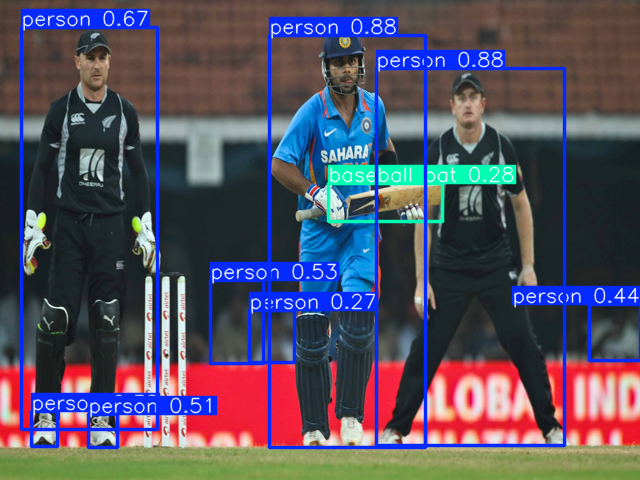

In [15]:
from PIL import Image

# Loading the local image
image_path = 'Virat_Kohli_Batting.jpg'
img_data = Image.open(image_path)

img_data = img_data.resize((640, 480))  # Adjust size as necessary

# Pass the image data to the model
results = model(img_data)
results.print()

# Display the results
results.show()

In [17]:
import numpy as np
np.array(results.render()).shape

(1, 480, 640, 3)

# Load Custom Model

In [19]:
import os

file_path = 'yolov5/runs/train/exp/weights/last.pt'

# Check if the file exists
if os.path.exists(file_path):
    print("File detected at:", file_path)
else:
    print("File not found at:", file_path)

File detected at: yolov5/runs/train/exp/weights/last.pt


In [23]:
import torch
import pathlib

# TO prevent `NotImplementedError`
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

path = 'yolov5/runs/train/exp/weights/last.pt'

try:
    model = torch.hub.load('ultralytics/yolov5', 'custom', path=path, force_reload=True)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Loading failed due to an error: {e}")

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\20pra/.cache\torch\hub\master.zip
YOLOv5  2024-11-3 Python-3.12.4 torch-2.5.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Model loaded successfully.


C:\Users\20pra/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 480x640 1 drowsy
Speed: 0.0ms pre-process, 216.1ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


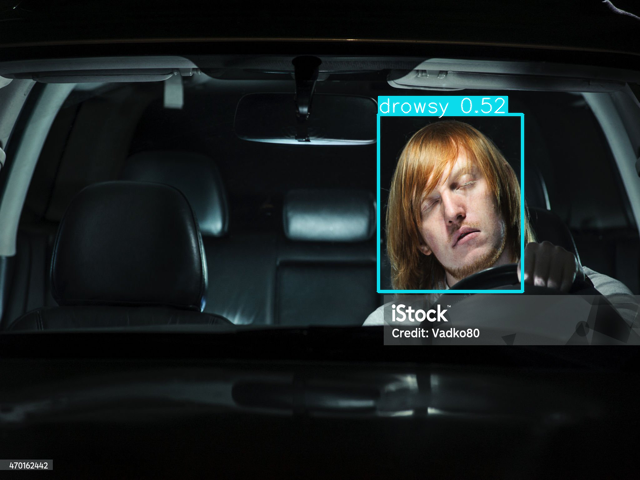

In [25]:
image_path = 'Drowsy.jpg'
img_data = Image.open(image_path)

img_data = img_data.resize((640, 480))  # Adjust size as necessary

# Passing the image data to the model
results = model(img_data)
results.print()

# Display the results
results.show()

C:\Users\20pra/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 480x640 1 awake
Speed: 5.0ms pre-process, 161.4ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)


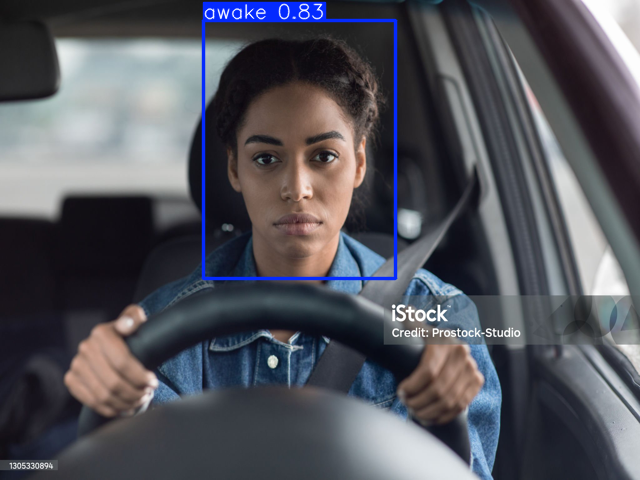

In [27]:
image_path = 'Awake.jpg'
img_data = Image.open(image_path)

img_data = img_data.resize((640, 480))  # Adjust size as necessary

# Passing the image data to the model
results = model(img_data)
results.print()

# Display the results
results.show()

C:\Users\20pra/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 480x640 1 drowsy
Speed: 5.1ms pre-process, 179.4ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


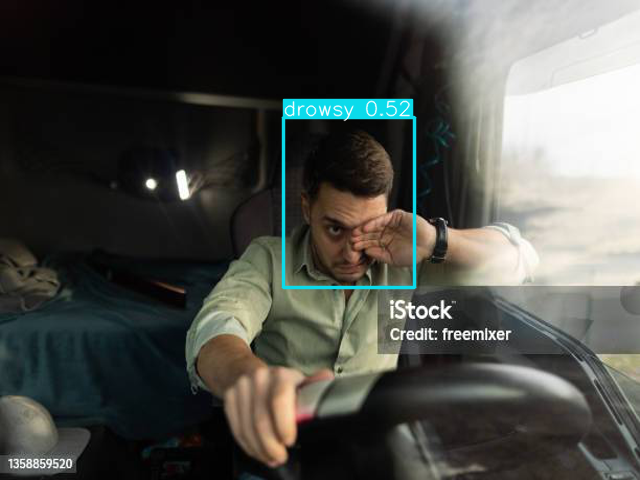

In [29]:
image_path = 'Person.jpg'
img_data = Image.open(image_path)

img_data = img_data.resize((640, 480))  # Adjust size as necessary

# Passing the image data to the model
results = model(img_data)
results.print()

# Display the results
results.show()

In [31]:
# WORKS PERFECTLY TILL HERE

In [33]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Exit if the frame is not captured properly

    # Make the detections
    results = model(frame)

    # Render results
    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


C:\Users\20pra/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\20pra/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\20pra/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\20pra/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\20pra/.cache\torch\hub\ultralytics_yolov5_master\models

### Improvement and Corrections
1. Train on images from varying distances from camera
2. Train on images from side angle of camera
3. Modify model to not detect anything in-human